# Assignment 7 
## Diabetes risk factors

## Purpose
The purpose of this assignment  is to identify markers that can indicate a risc of diabetes. 
and to explore if  we can  create a short form of questions that accurately predicts diabetes or high diabetes risk through feature selection.
The dataset originally has 330 features, but based USA Institute of Diabetes Diseaes studies https://www.niddk.nih.gov/health-information/diabetes/overview/risk-factors-type-2-diabetes where identified folowing Type 2 diabetes  risk factors:

*   Blood pressure (high)
*   Cholesterol (high)
*   Smoking
*   Family history
*   Obesity
*   Age
*   Sex
*   Race
*   Diet
*   Physical activity
*   Alcohol consumption
*   BMI
*   Household Income
*   Sleep behaviour
*   Education level
*   Mental Health

### Selected  features from BRFSS 2015
Considering the diabetes risk factors we identified the folowing relevant features in the BRFSS dataset. To interpret the columns accurately, we consulted the BRFSS 2015 Codebook to understand the questions and their context.

**Dataset source:** https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

**BRFSS 2015 Codebook:** https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf


**Diabetes questions**
*   (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) - DIABETE3

**Chronic Health Conditions**
*   (Ever told) you had a stroke. - CVDSTRK3
*   Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) - _MICHD


**High Blood Pressure**
*   Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional - _RFHYPE5

**High Cholesterol**
*   Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? - TOLDHI2
*   Cholesterol check within past five years - _CHOLCHK

**BMI**
*   Body Mass Index (BMI) - _BMI5

**Demographics questions**
*   Indicate sex of respondent. - SEX
*   Fourteen-level age category - _AGEG5YR
*   What is the highest grade or year of school you completed? - EDUCA
*   Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") - INCOME2

**Smoking**
*   Have you smoked at least 100 cigarettes in your entire life? - SMOKE100


**Physical Activity**
*   Adults who reported doing physical activity or exercise during the past 30 days other than their regular job - _TOTINDA

**Nutrition questions**
*   Consume Fruit 1 or more times per day - _FRTLT1
*   Consume Vegetables 1 or more times per day - _VEGLT1

**Alcohol Consumption**
*   Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) - _RFDRHV5


**Health questions**
*   Would you say that in general your health is: --> GENHLTH
*   Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
*   Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
*   Do you have serious difficulty walking or climbing stairs? --> DIFFWALK



In [37]:
#imports
import os
import pandas as pd
import numpy as np
import random
random.seed(1)

In [38]:

# We chose the 2015 dataset because it contains the largest amount of survey data from last 20 years.
brfss_2015_dataset = pd.read_csv('behavioral-risk-factor-surveillance-system-2015.csv')

#How many rows and columns
brfss_2015_dataset.shape

(441456, 330)

**Currently, our dataset consists of 441456 records, each with 330 columns. Every record represents an individual's responses to the BRFSS survey.**

In [39]:
# select specific columns
brfss_df_selected = brfss_2015_dataset[['DIABETE3',
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', '_MICHD', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

brfss_df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [40]:
# Calculate percentage of missing values for each column
missing_percentages_selected = (brfss_df_selected.isnull().sum() / len(brfss_df_selected)) * 100
missing_df_selected = pd.DataFrame({
    'Column': brfss_df_selected.columns,
    'Missing Percentage': missing_percentages_selected
})
missing_df_selected = missing_df_selected.sort_values(by='Missing Percentage', ascending=False)

print(missing_df_selected)


            Column  Missing Percentage
TOLDHI2    TOLDHI2           13.399750
_BMI5        _BMI5            8.244989
SMOKE100  SMOKE100            3.229087
DIFFWALK  DIFFWALK            2.793936
_MICHD      _MICHD            0.892954
INCOME2    INCOME2            0.747753
DIABETE3  DIABETE3            0.001586
GENHLTH    GENHLTH            0.000453
MEDCOST    MEDCOST            0.000227
PHYSHLTH  PHYSHLTH            0.000227
CVDSTRK3  CVDSTRK3            0.000000
_TOTINDA  _TOTINDA            0.000000
_FRTLT1    _FRTLT1            0.000000
_VEGLT1    _VEGLT1            0.000000
_RFHYPE5  _RFHYPE5            0.000000
HLTHPLN1  HLTHPLN1            0.000000
MENTHLTH  MENTHLTH            0.000000
_CHOLCHK  _CHOLCHK            0.000000
SEX            SEX            0.000000
_AGEG5YR  _AGEG5YR            0.000000
EDUCA        EDUCA            0.000000
_RFDRHV5  _RFDRHV5            0.000000


# Modify and clean the data

In [41]:
# Drop mising values
brfss_df_selected = brfss_df_selected.dropna()

# DIABETE3
#  make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['DIABETE3'] = brfss_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 9]
brfss_df_selected.DIABETE3.unique()


# _RFHYPE5
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
brfss_df_selected._RFHYPE5.unique()

# TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]
brfss_df_selected.TOLDHI2.unique()

# _CHOLCHK
# Change 3 to 0 and 2 to 0 for not checked cholesterol in past 5 years
# Remove 9
brfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]
brfss_df_selected._CHOLCHK.unique()

# _BMI5 (no changes, but  these are BMI * 100. So for example a BMI of 4018 is  40.18)
brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
brfss_df_selected._BMI5.unique()

# SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
brfss_df_selected.SMOKE100.unique()

# CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
brfss_df_selected.CVDSTRK3.unique()

# _MICHD
#Change 2 to 0 because this means did not have MI or CHD
brfss_df_selected['_MICHD'] = brfss_df_selected['_MICHD'].replace({2: 0})
brfss_df_selected._MICHD.unique()

# _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
brfss_df_selected._TOTINDA.unique()

# _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
brfss_df_selected['_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
brfss_df_selected._FRTLT1.unique()

# _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
brfss_df_selected['_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
brfss_df_selected._VEGLT1.unique()

# _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
brfss_df_selected['_RFDRHV5'] = brfss_df_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFDRHV5 != 9]
brfss_df_selected._RFDRHV5.unique()

# GENHLTH
# This is an ordinal variable that we want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
brfss_df_selected.GENHLTH.unique()

# DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
brfss_df_selected.DIFFWALK.unique()

# SEX
# change 2 to 0 (female as 0). Male is 1
brfss_df_selected['SEX'] = brfss_df_selected['SEX'].replace({2:0})
brfss_df_selected.SEX.unique()

# _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 is 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
brfss_df_selected._AGEG5YR.unique()

# EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
brfss_df_selected.EDUCA.unique()

# INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
brfss_df_selected.INCOME2.unique()

# MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
brfss_df_selected.MENTHLTH.unique()

# PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
brfss_df_selected.PHYSHLTH.unique()

# MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 9]
brfss_df_selected.MEDCOST.unique()

# HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 9]
brfss_df_selected.HLTHPLN1.unique()

brfss_df_selected.shape


(253680, 22)

In [42]:
#Rename the columns to make them more readable
brfss = brfss_df_selected.rename(columns = {'DIABETE3':'Diabetes_012', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

In [43]:
brfss.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64

**Now we have 18 columns and 259,250 rows, of which 217,932 are non-diabetic, 4,783 are pre-diabetic, and 36,535 are diabetic.
To perform binary classification, we include prediabetics with diabetics because they have been informed by a doctor that they are at risk of developing diabetes. We aim to predict this risk, so we have 41,318 individuals at risk of diabetes and randomly select another 41,318 non-diabetics.**

In [44]:
#Copy old table to new one.
brfss_binary = brfss
# Change the diabetics (2) and pre-diabetics (1) to 1, so that we have 0 meaning non-diabetic and 1 meaning diabetic or pre-diabetic.
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({1: 1, 2: 1})

#Change the column name to Diabetes_binary
brfss_binary = brfss_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()
#show class sizes
brfss_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    213703
1.0     39977
dtype: int64

In [45]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = brfss_binary['Diabetes_binary'] == 1
brfss_5050_1 = brfss_binary[is1]

#Get the 0s
is0 = brfss_binary['Diabetes_binary'] == 0
brfss_5050_0 = brfss_binary[is0] 

#Select the 41318 random cases from the 0 (non-diabetes group). we already have 41318 cases from the diabetes risk group
brfss_5050_0_rand1 = brfss_5050_0.take(np.random.permutation(len(brfss_5050_0))[:41318])

#Concat the 41318 1s to the 41318 randomly selected 0s
brfss_5050 = pd.concat([brfss_5050_0_rand1, brfss_5050_1], ignore_index=True)

#See the classes are perfectly balanced now
brfss_5050.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    41318
1.0    39977
dtype: int64

In [46]:
#Full cleaned dataset
brfss

#The original binary dataset
brfss_binary

#The 50-50 balanced dataset 
brfss_5050

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,22.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
1,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
2,0.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,13.0,4.0,3.0
3,0.0,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
4,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81290,1.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0
81291,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
81292,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
81293,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


## Identifying the best model for predicting diabetes risk

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





**Preprocess the Data**

In [48]:
# Separate features and target
X = brfss_5050.drop('Diabetes_binary', axis=1)
y = brfss_5050['Diabetes_binary']

#Standardize the features to ensure they have a mean of 0 and a variance of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



**Defining Models and Hyperparameters**

In [49]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg_params = {'C': [0.01, 0.1, 1, 10, 100]}

# RandomForestClassifier
rf = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}

# GaussianNB
nb = GaussianNB()


**Hyperparameter Tuning and Cross-Validation**

In [50]:
#We will use GridSearchCV for hyperparameter tuning and KFold for cross-validation.
# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# KNeighborsClassifier
grid_knn = GridSearchCV(knn, knn_params, cv=cv, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# LogisticRegression
grid_logreg = GridSearchCV(logreg, logreg_params, cv=cv, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# RandomForestClassifier
grid_rf = GridSearchCV(rf, rf_params, cv=cv, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# DecisionTreeClassifier
grid_dt = GridSearchCV(dt, dt_params, cv=cv, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Naive Bayes (no hyperparameter tuning needed for GaussianNB)
nb.fit(X_train, y_train)


GaussianNB()

**Models evaluation**

In [51]:
# Evaluate KNeighborsClassifier
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
print("KNeighborsClassifier")
print("Best Parameters:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Evaluate LogisticRegression
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test)
print("\nLogisticRegression")
print("Best Parameters:", grid_logreg.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Evaluate RandomForestClassifier
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("\nRandomForestClassifier")
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate DecisionTreeClassifier
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("\nDecisionTreeClassifier")
print("Best Parameters:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Evaluate Naive Bayes
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


KNeighborsClassifier
Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.7141275601205486
Confusion Matrix:
 [[5684 2577]
 [2071 5927]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      8261
         1.0       0.70      0.74      0.72      7998

    accuracy                           0.71     16259
   macro avg       0.71      0.71      0.71     16259
weighted avg       0.72      0.71      0.71     16259


LogisticRegression
Best Parameters: {'C': 1}
Accuracy: 0.7414970170367181
Confusion Matrix:
 [[5968 2293]
 [1910 6088]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      8261
         1.0       0.73      0.76      0.74      7998

    accuracy                           0.74     16259
   macro avg       0.74      0.74      0.74     16259
weighted avg       0.74      0.74      0.74     16259


RandomForestClassifier

### Its was found that  best model is the RandomForestClassifier with the following details:
 Best Parameters: {'max_depth': 10, 'n_estimators': 200}
 Accuracy: 0.7475798644724104

## Corelation between features

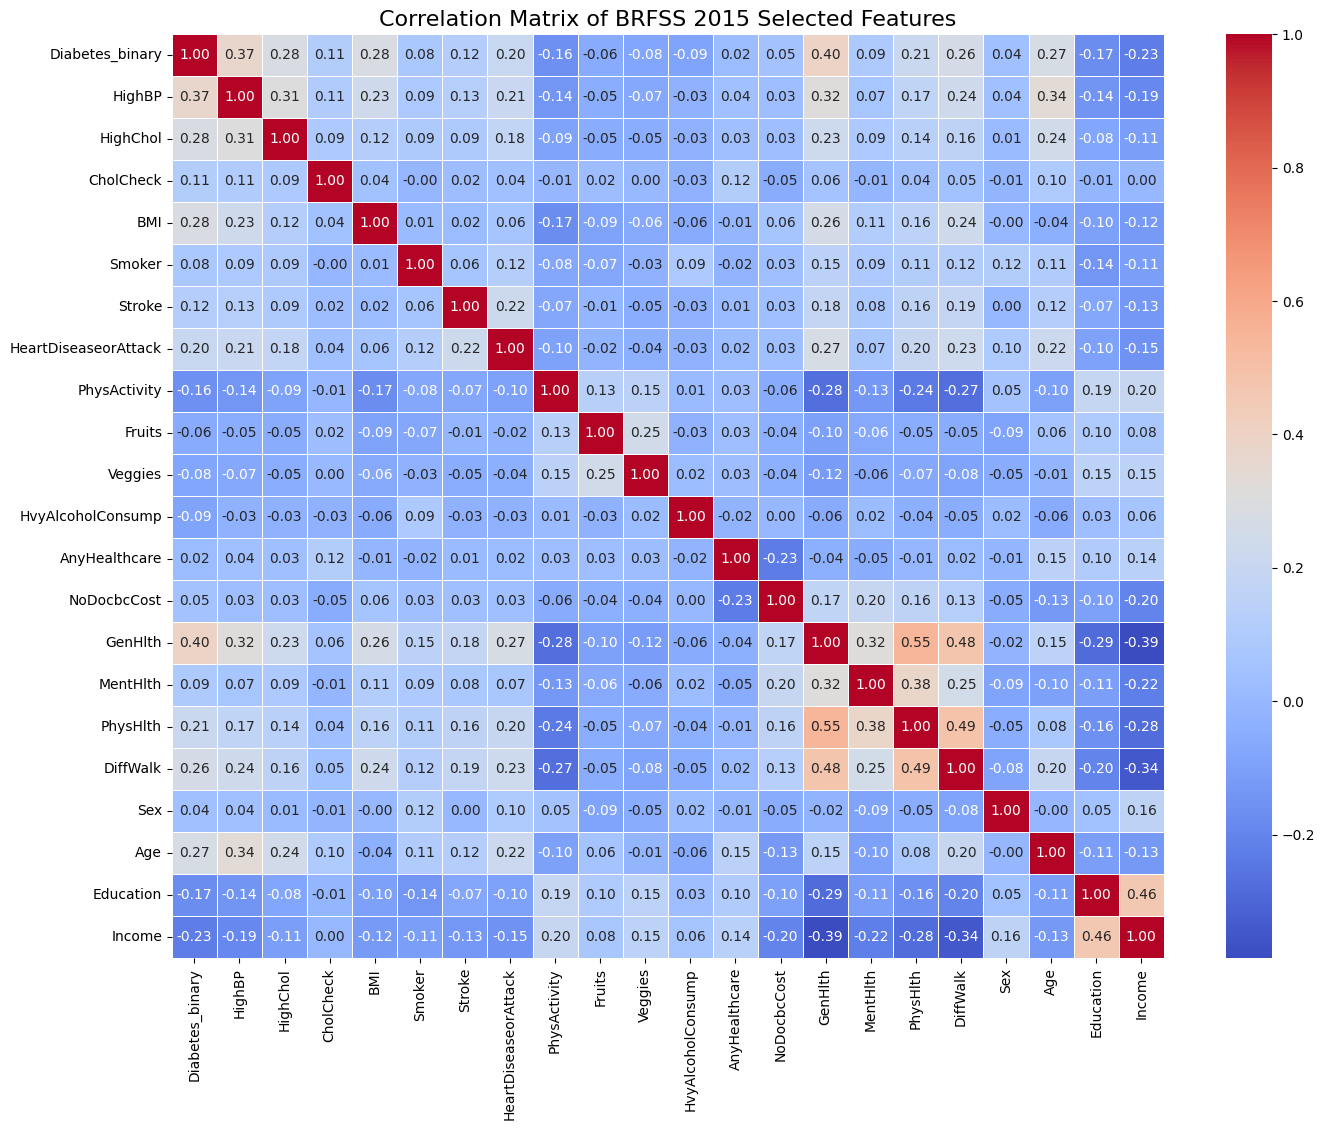

In [52]:

# Calculate the correlation matrix
correlation_matrix = brfss_5050.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of BRFSS 2015 Selected Features', fontsize=16)
plt.show()


## Correlation between features and the target variable (Diabetes_binary)

C:\Users\bolfa\AppData\Local\Temp\ipykernel_10836\1662177218.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=target_correlation_df[1:], palette='viridis')


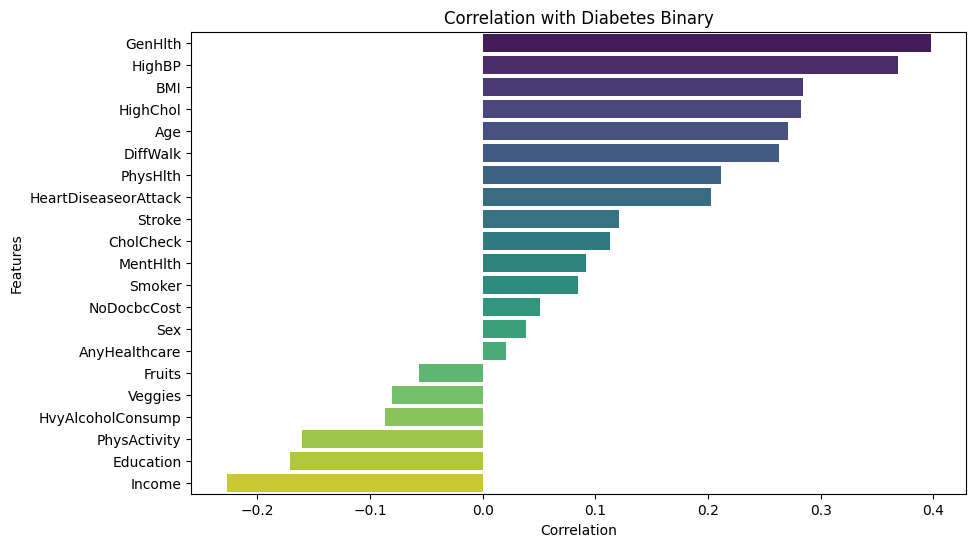

In [53]:
# Calculate correlation with the target variable
target_correlation = brfss_5050.corr()['Diabetes_binary'].sort_values(ascending=False)

# Create a DataFrame for better visualization
target_correlation_df = pd.DataFrame({
    'Feature': target_correlation.index,
    'Correlation': target_correlation.values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=target_correlation_df[1:], palette='viridis')
plt.title('Correlation with Diabetes Binary')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()


# Feature Importance 

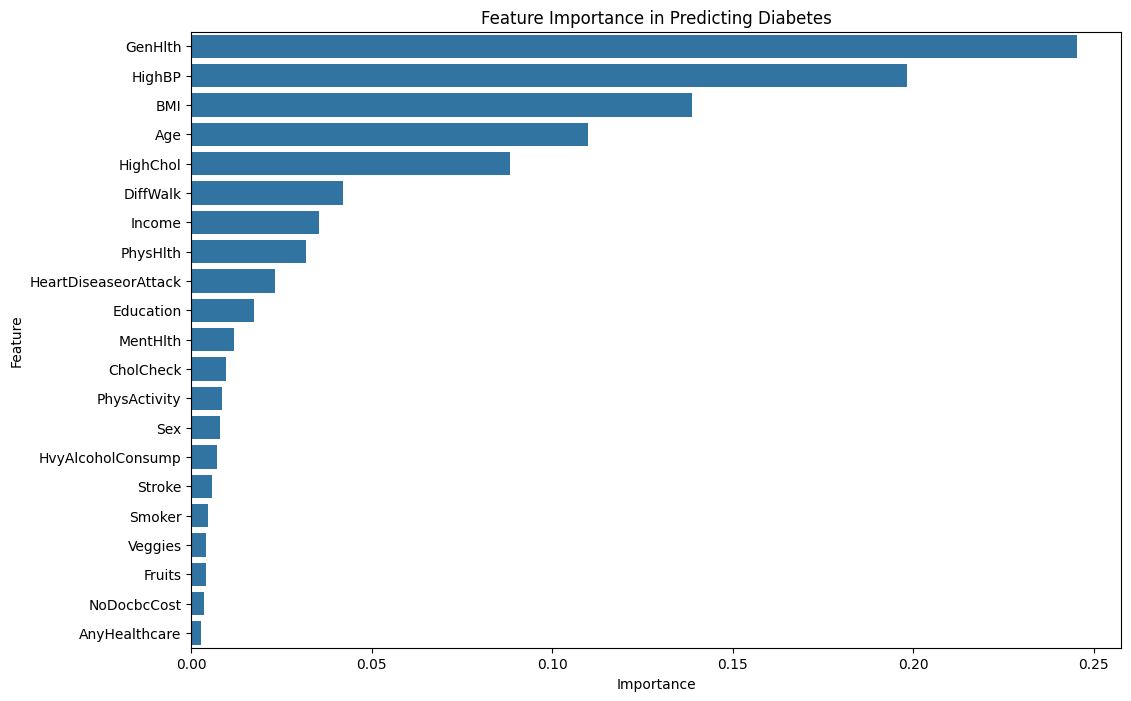

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Diabetes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

